In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset = pd.read_csv('creditcard.csv')

In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
dataset['Time'] = pd.to_datetime(dataset['Time'])

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    284807 non-null  datetime64[ns]
 1   V1      284807 non-null  float64       
 2   V2      284807 non-null  float64       
 3   V3      284807 non-null  float64       
 4   V4      284807 non-null  float64       
 5   V5      284807 non-null  float64       
 6   V6      284807 non-null  float64       
 7   V7      284807 non-null  float64       
 8   V8      284807 non-null  float64       
 9   V9      284807 non-null  float64       
 10  V10     284807 non-null  float64       
 11  V11     284807 non-null  float64       
 12  V12     284807 non-null  float64       
 13  V13     284807 non-null  float64       
 14  V14     284807 non-null  float64       
 15  V15     284807 non-null  float64       
 16  V16     284807 non-null  float64       
 17  V17     284807 non-null  floa

In [10]:
dataset.describe().T.head()

,count,mean,min,25%,50%,75%,max,std
Time,284807,1970-01-01 00:00:00.000094813,1970-01-01 00:00:00,1970-01-01 00:00:00.000054201,1970-01-01 00:00:00.000084692,1970-01-01 00:00:00.000139320,1970-01-01 00:00:00.000172792,NaN
V1,284807.0,0.0,-56.40751,-0.920373,0.018109,1.315642,2.45493,1.958696
V2,284807.0,-0.0,-72.715728,-0.59855,0.065486,0.803724,22.057729,1.651309
V3,284807.0,-0.0,-48.325589,-0.890365,0.179846,1.027196,9.382558,1.516255
V4,284807.0,0.0,-5.683171,-0.84864,-0.019847,0.743341,16.875344,1.415869


In [11]:
dataset.shape

(284807, 31)

In [12]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

FRAUD CASES AND GENUINE CASES

In [13]:
fraud_cases=len(dataset[dataset['Class']==1])
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [14]:
non_fraud_cases=len(dataset[dataset['Class']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [15]:
fraud=dataset[dataset['Class']==1]

In [16]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [17]:
genuine=dataset[dataset['Class']==0]

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
# statistical measures of the data
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
# compare the values for both transactions
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,1970-01-01 00:00:00.000094838,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,1970-01-01 00:00:00.000080746,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
genuine_sample = genuine.sample(n=492)

In [23]:
new_dataset = pd.concat([genuine_sample,fraud],axis=0)

In [24]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
107139,1970-01-01 00:00:00.000070299,1.441308,-0.896286,0.210514,-1.465373,-1.148481,-0.593778,-0.754972,-0.057452,-2.357200,...,-0.477257,-1.060244,0.257550,0.140659,0.096185,-0.527159,0.020817,0.006718,11.90,0
213756,1970-01-01 00:00:00.000139383,-1.183135,1.062547,1.909004,2.577869,1.601438,0.476209,0.935453,0.167207,-2.035868,...,-0.444256,-1.688006,0.104140,0.359220,0.312697,-0.527831,-0.026619,0.088975,52.96,0
254620,1970-01-01 00:00:00.000156824,-0.063492,0.759236,0.454257,-0.456633,0.237717,-1.395395,1.015987,-0.233520,-0.075898,...,-0.217872,-0.497481,0.169333,0.451536,-0.535571,0.111642,0.240216,0.104341,16.99,0
177744,1970-01-01 00:00:00.000123325,-2.223012,-0.753878,1.907822,0.084153,1.433443,-0.475670,0.131101,0.254938,-0.238953,...,-0.168379,-0.630236,0.336419,-0.492869,0.639041,-0.927368,-0.082426,0.198462,61.40,0
197659,1970-01-01 00:00:00.000132120,0.893414,-2.941352,-1.071441,-0.514260,-1.196740,0.932061,-0.502994,0.112830,-0.075770,...,0.848153,1.323551,-0.303386,-0.941653,-0.616161,-0.033415,-0.035521,0.047725,597.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1970-01-01 00:00:00.000169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1970-01-01 00:00:00.000169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,1970-01-01 00:00:00.000169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,1970-01-01 00:00:00.000169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [25]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [26]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,1970-01-01 00:00:00.000095193,0.022040,-0.064131,0.051404,-0.122196,0.069161,-0.120838,0.028191,0.025018,-0.004154,...,-0.006214,-0.030352,-0.037879,-0.024210,0.01161,0.015280,-0.026935,-0.019250,0.026864,82.571016
1,1970-01-01 00:00:00.000080746,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


EXPLORATORY DATA ANALYSYIS

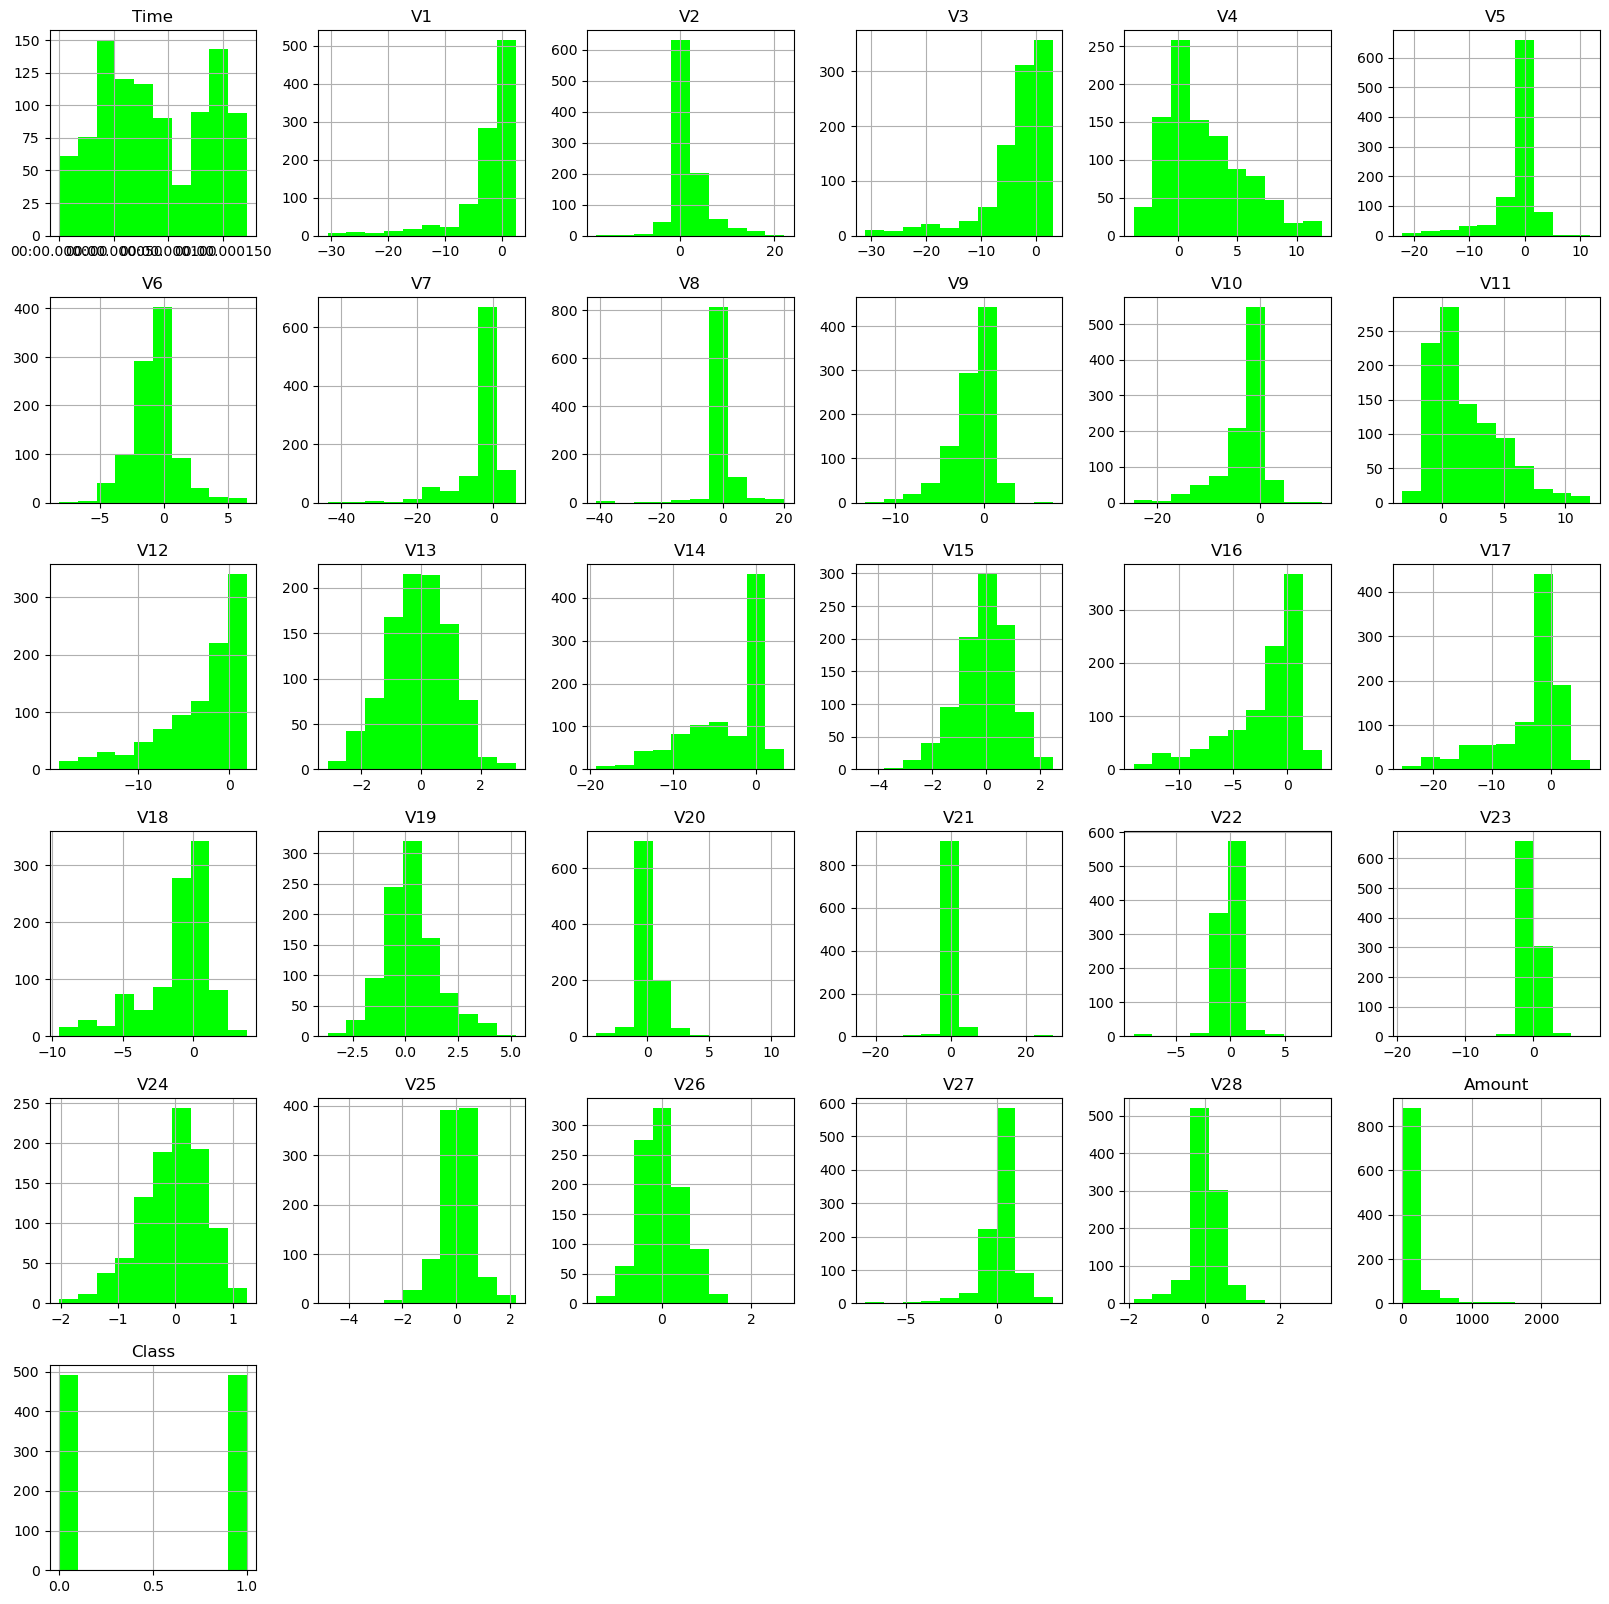

In [27]:
new_dataset.hist(figsize=(20,20),color='lime')
plt.show()

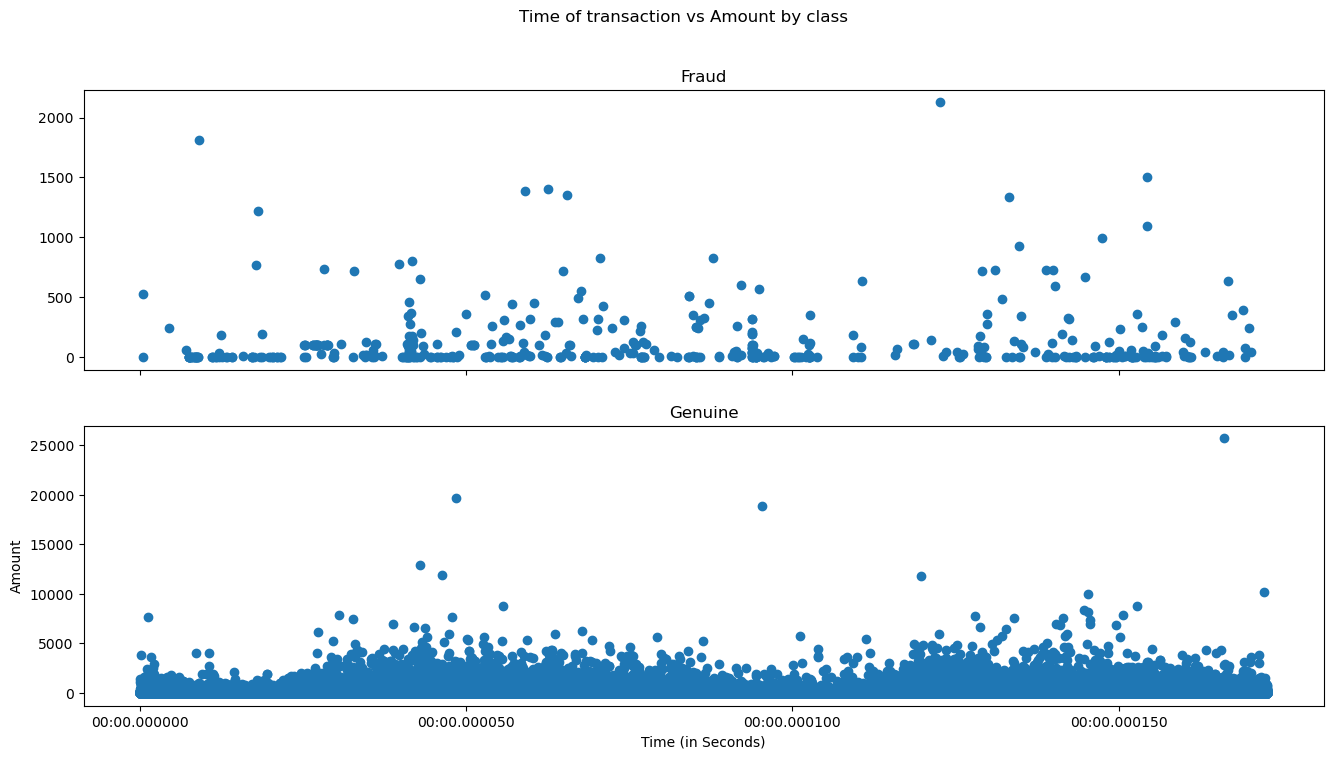

In [28]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

CORRELATION

In [29]:
cor=dataset.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


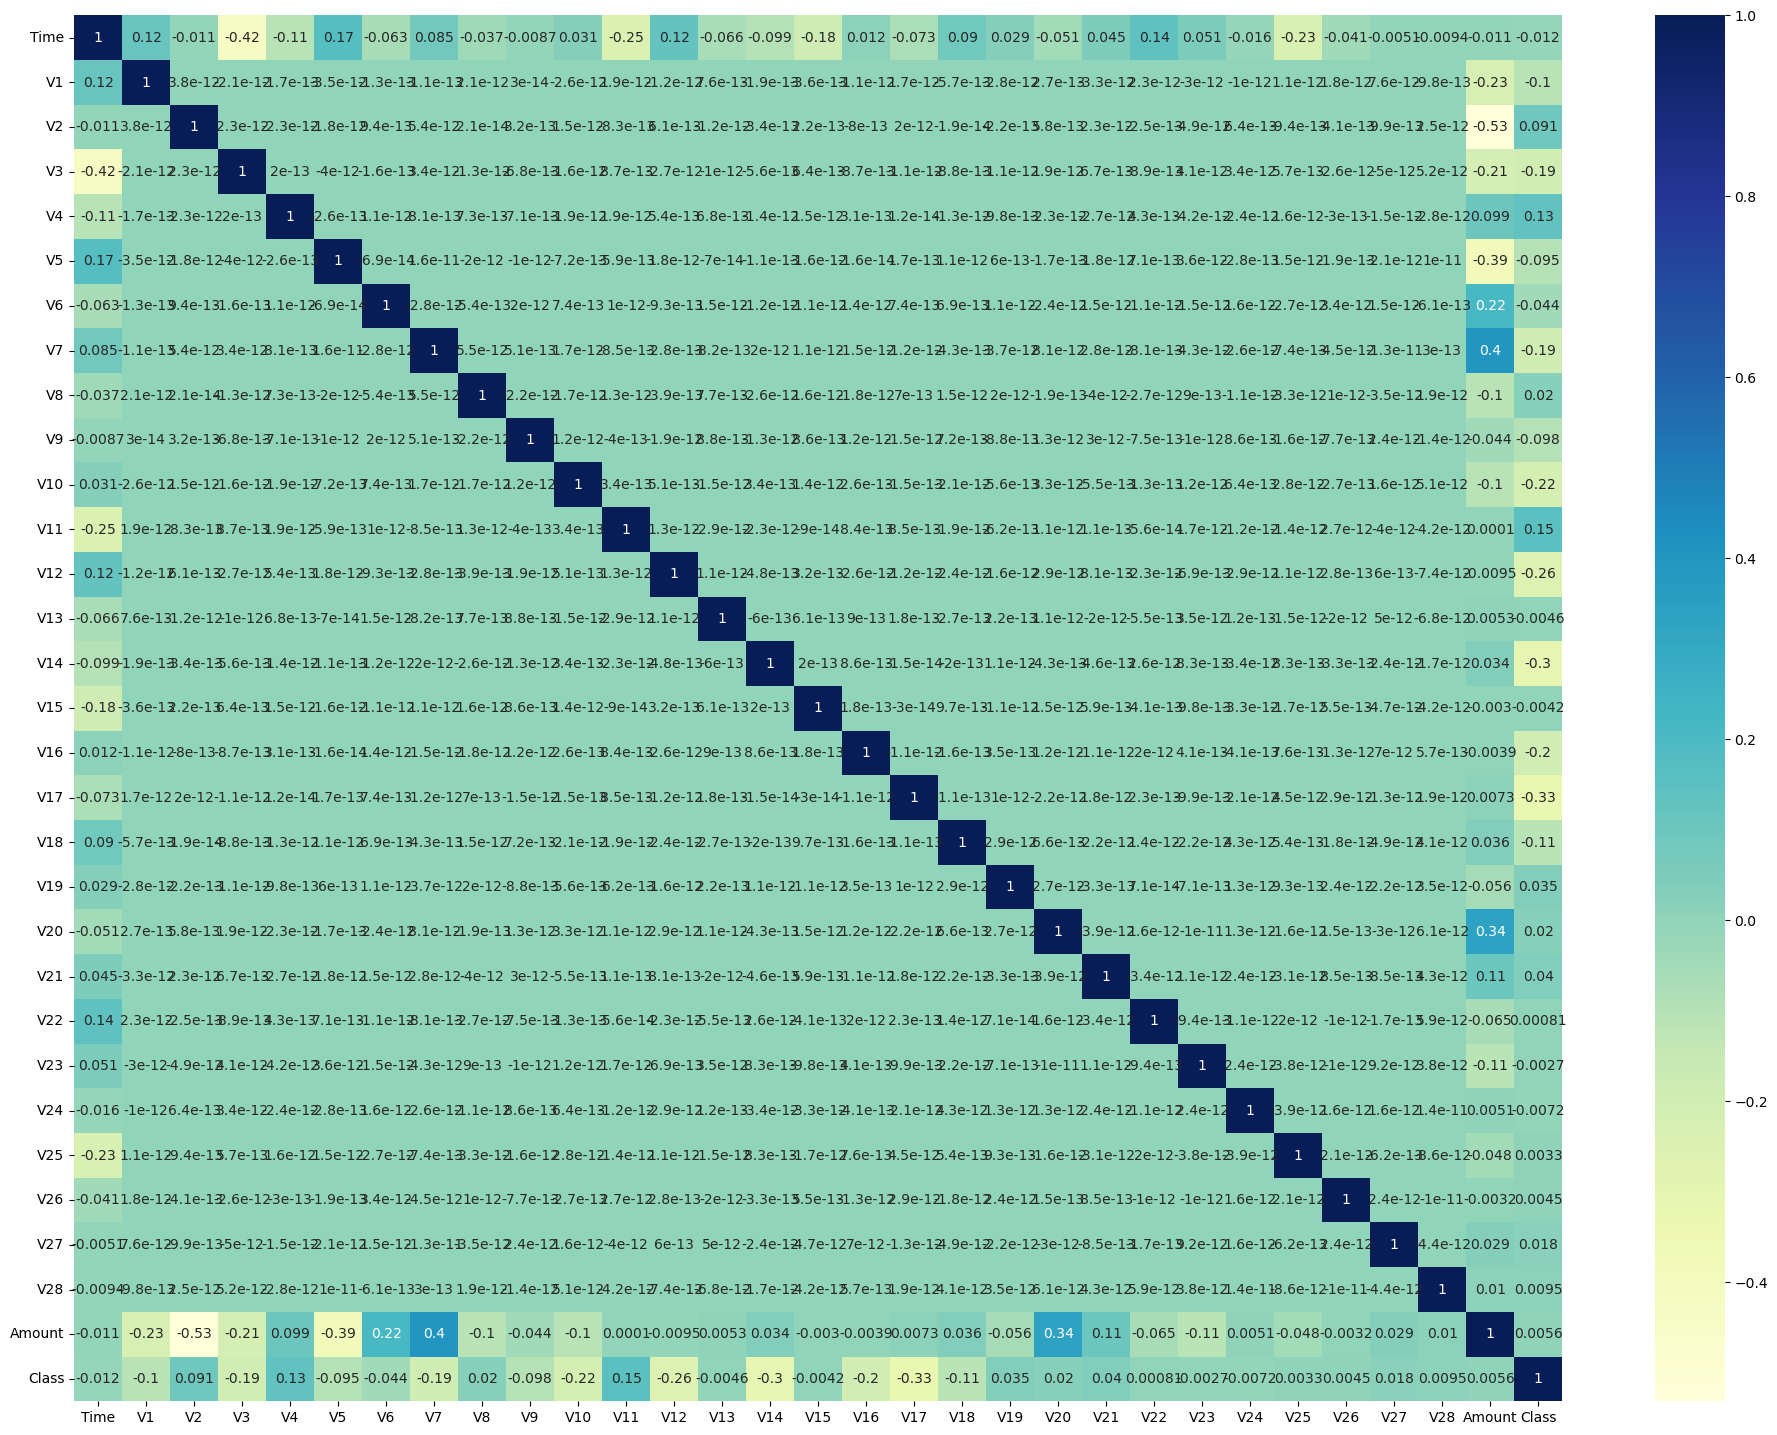

In [30]:
plt.figure(figsize=(24,18))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

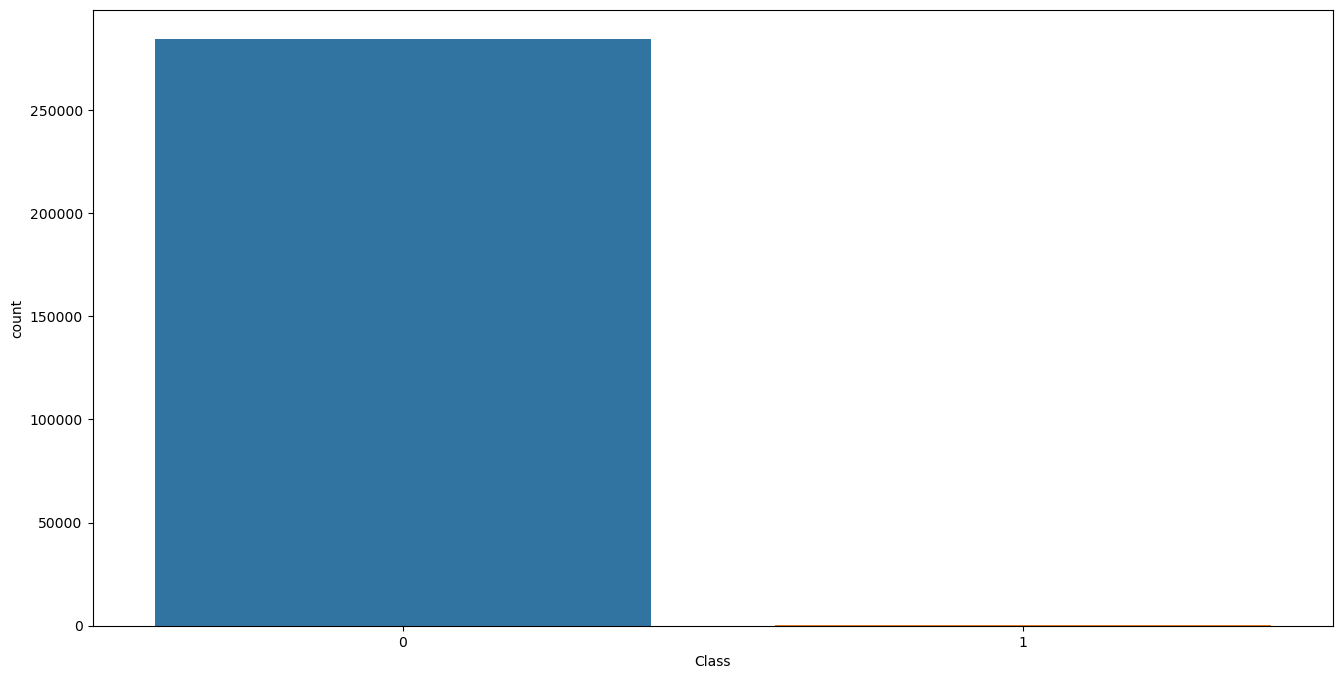

In [31]:
sns.countplot(x='Class', data = dataset)
plt.show()

In [32]:
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [33]:
classes=dataset['Class'].value_counts()
genuine_share=classes[0]/dataset['Class'].count()*100
fraud_share=classes[1]/dataset['Class'].count()*100

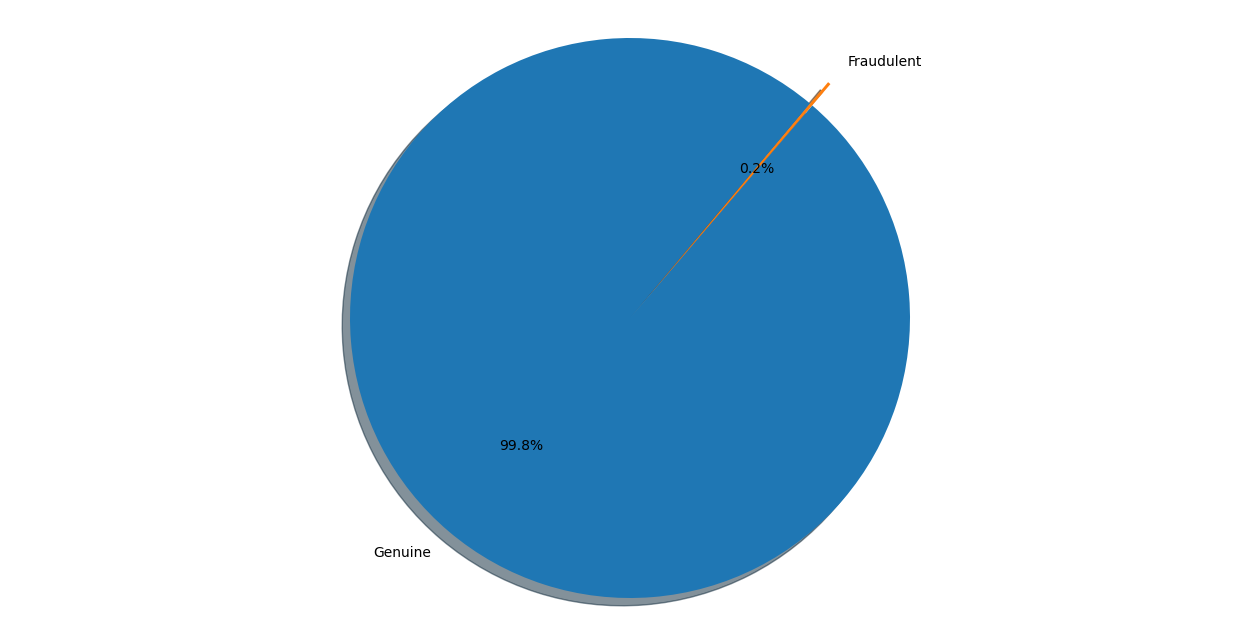

In [34]:
labels = 'Genuine', 'Fraudulent'
sizes = [genuine_share,fraud_share]
explode = (0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', shadow = True, startangle =50)
ax1.axis('equal')
plt.show()

Let us build our models:  Using Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [51]:
dataset.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
X=dataset.drop(['Class'],axis=1)

In [53]:
y=dataset['Class']

In [54]:
X.shape


(284807, 29)

In [55]:
y.shape

(284807,)

Balancing The Data using SMOTE Method

In [188]:
pip install --user imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [190]:
pip install --upgrade imbalanced-learn scikit-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---------- ---------------------------- 71.7/258.3 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [58]:
X_resampled.value_counts()

V1          V2          V3          V4         V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount    
-13.192671   12.785971  -9.906650    3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.000000      3403
-26.457745   16.497472  -30.177317   8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.966564  -7.263482  -1.324884  1.000000  

In [59]:
y_resampled.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [67]:
print(len(X_train))
print(len(X_test))

398041
170589


Using First Model (Logistic Regression)

In [68]:
model=LogisticRegression()

In [70]:
model.fit(X_train,y_train)

LogisticRegression()

In [72]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score

In [75]:
y_pred=model.predict(X_test)
print(y_pred)

[0 1 0 ... 1 1 1]


In [115]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [117]:
print('Accuracy of the model', accuracy)
print('precision of the model', precision)
print('Recall score of the model', recall)
print('f1_score of the model', f1)

Accuracy of the model 0.9583032903645604
precision of the model 0.9781809745912748
Recall score of the model 0.9376638576779026
f1_score of the model 0.9574939793595114


Using Second Model(Decision Tree)

In [80]:
from sklearn.tree import DecisionTreeClassifier


In [81]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
y_pred_dt=dt.predict(X_test)
print(y_pred_dt)

[1 1 0 ... 1 1 1]


In [111]:
accuracy = accuracy_score(y_test,y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

In [113]:
print('Accuracy of the model', accuracy)
print('precision of the model', precision)
print('Recall score of the model', recall)
print('f1_score of the model', f1)

Accuracy of the model 0.9979541471020992
precision of the model 0.9970675172035096
Recall score of the model 0.9988529962546816
f1_score of the model 0.99795945811627


Using Third Model (Random Forest Classification)

In [85]:
from sklearn.ensemble import RandomForestClassifier


In [86]:
classifier = RandomForestClassifier(n_estimators=5, random_state = 42)

In [87]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [89]:
y_pred_rf = classifier.predict(X_test)
(y_pred_rf)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [118]:
accuracy = accuracy_score(y_test,y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

In [119]:
print('Accuracy of the model', accuracy)
print('precision of the model', precision)
print('Recall score of the model', recall)
print('f1_score of the model', f1)

Accuracy of the model 0.9997831044205664
precision of the model 0.9996255864836721
Recall score of the model 0.9999414794007491
f1_score of the model 0.9997835079897254


Using XGBoost

In [92]:
import xgboost as xgb


In [94]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [95]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [96]:
y_pred_xgb=xgb_model.predict(X_test)
y_pred_xgb

array([1, 1, 0, ..., 1, 1, 1])

In [120]:
accuracy = accuracy_score(y_test,y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

In [121]:
print('Accuracy of the model', accuracy)
print('precision of the model', precision)
print('Recall score of the model', recall)
print('f1_score of the model', f1)

Accuracy of the model 0.9998182766766908
precision of the model 0.9996373038808485
Recall score of the model 1.0
f1_score of the model 0.9998186190473404


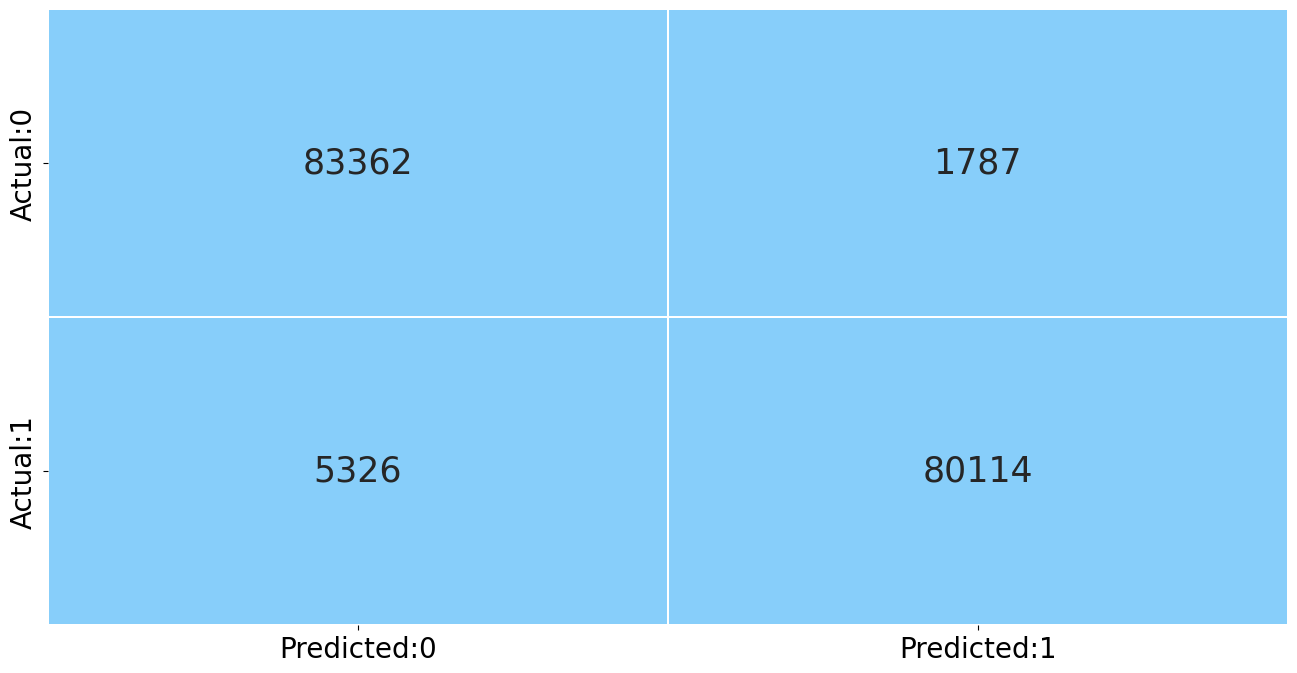

In [100]:
# creating confusion matrix for Logistic regression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar= False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

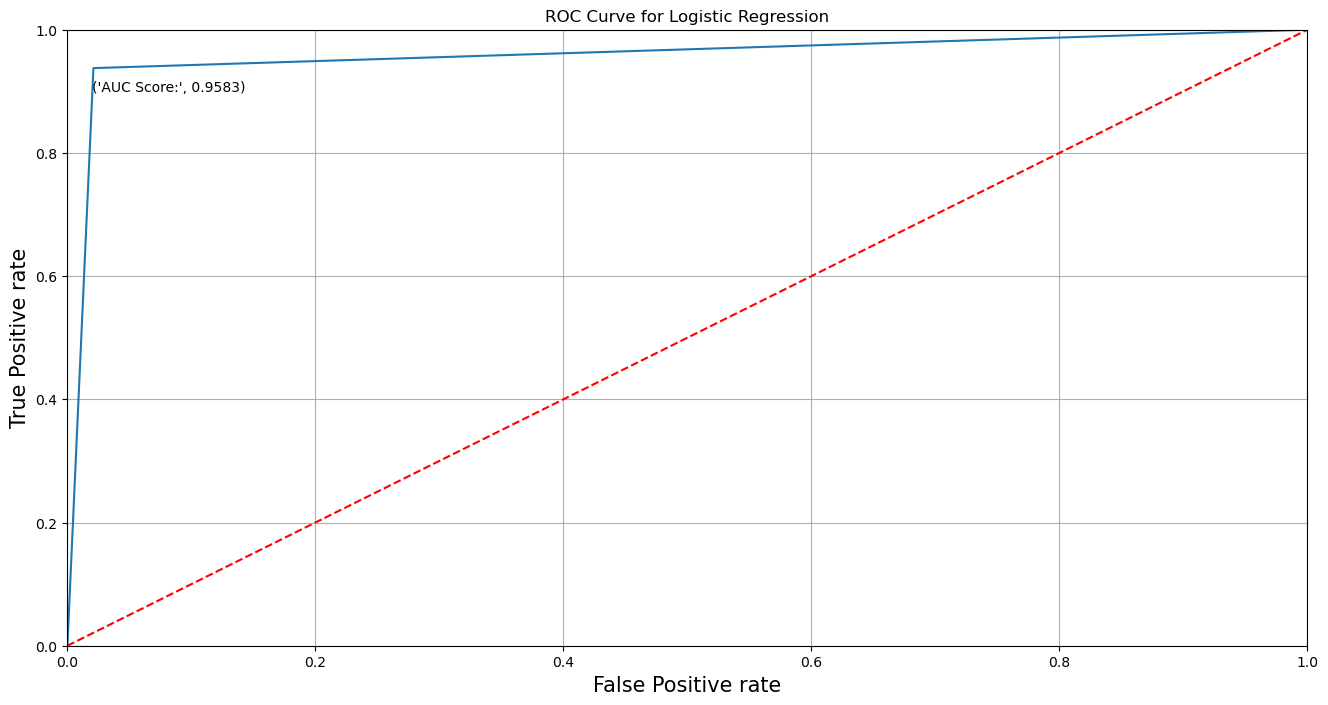

In [104]:
# findind roc curve for Logistic regression

from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], 'r--')

plt.title('ROC curve' , fontsize = 15)
plt.xlabel('False Positive rate', fontsize = 15)
plt.ylabel('True Positive rate', fontsize = 15)

plt.text(x= 0.02, y = 0.9, s = ('AUC Score:' , round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.title("ROC Curve for Logistic Regression")
plt.grid(True)

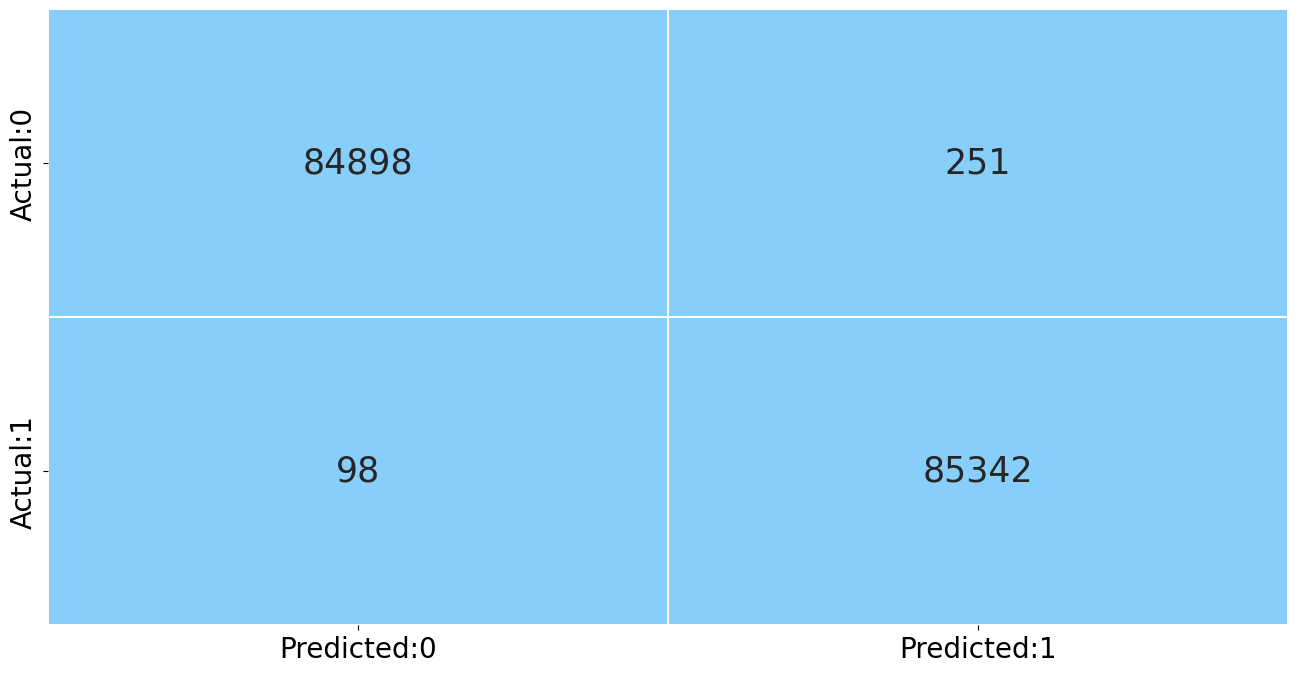

In [106]:
# creating confusion matrix for Decision Tree
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
cm = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar= False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

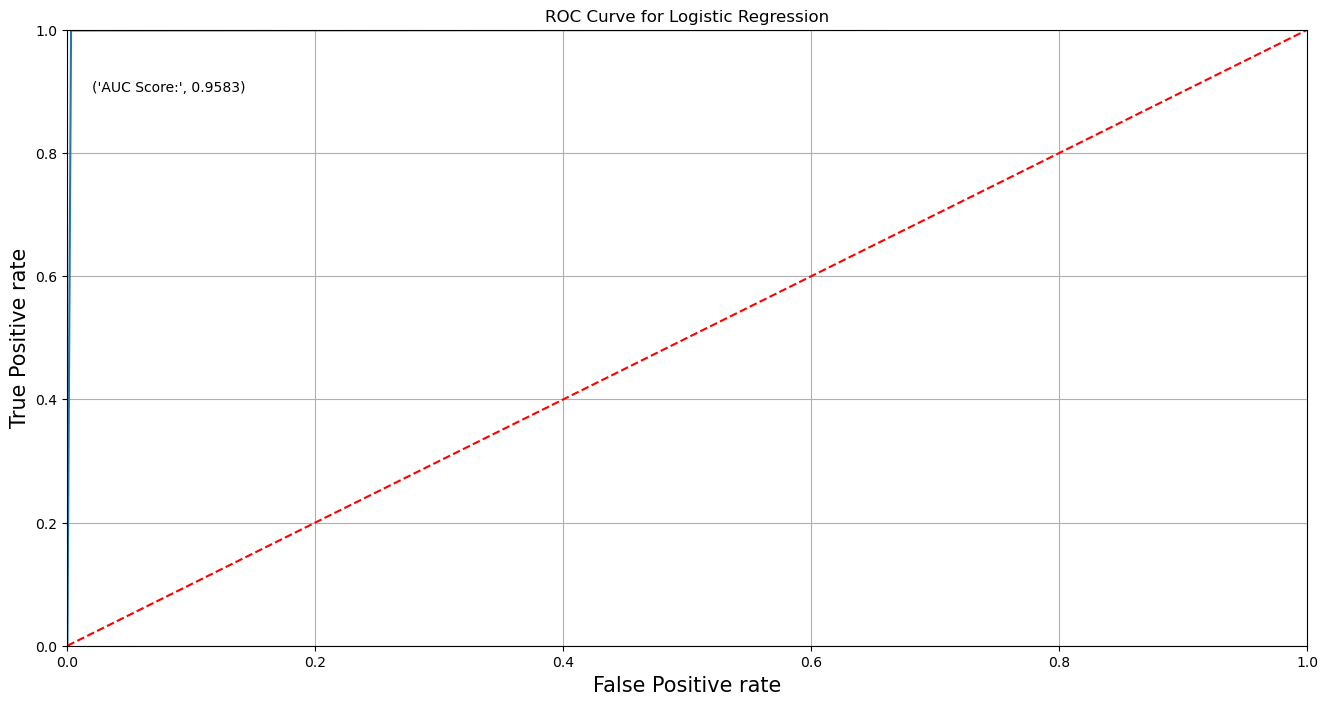

In [107]:
# findind roc curve for Decision Tree

from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], 'r--')

plt.title('ROC curve' , fontsize = 15)
plt.xlabel('False Positive rate', fontsize = 15)
plt.ylabel('True Positive rate', fontsize = 15)

plt.text(x= 0.02, y = 0.9, s = ('AUC Score:' , round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.title("ROC Curve for Logistic Regression")
plt.grid(True)

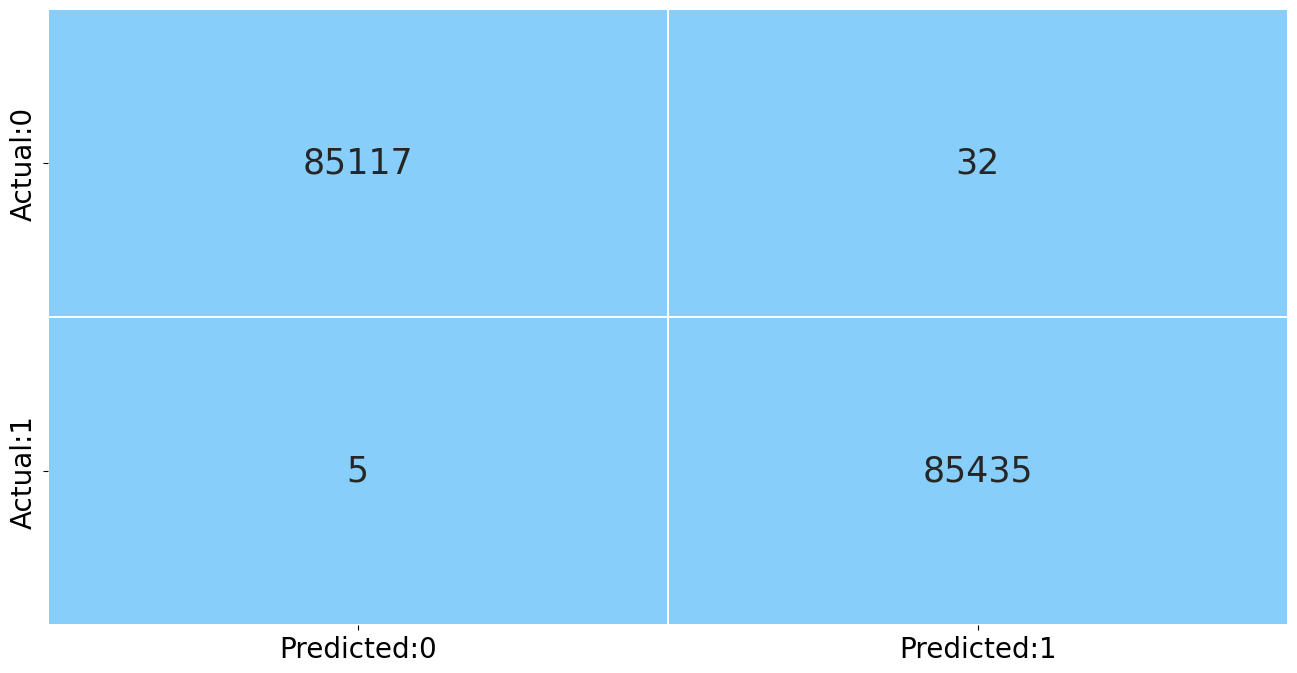

In [109]:
# creating confusion matrix for Random forest
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
cm = confusion_matrix(y_test, y_pred_rf, labels=classifier.classes_)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar= False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

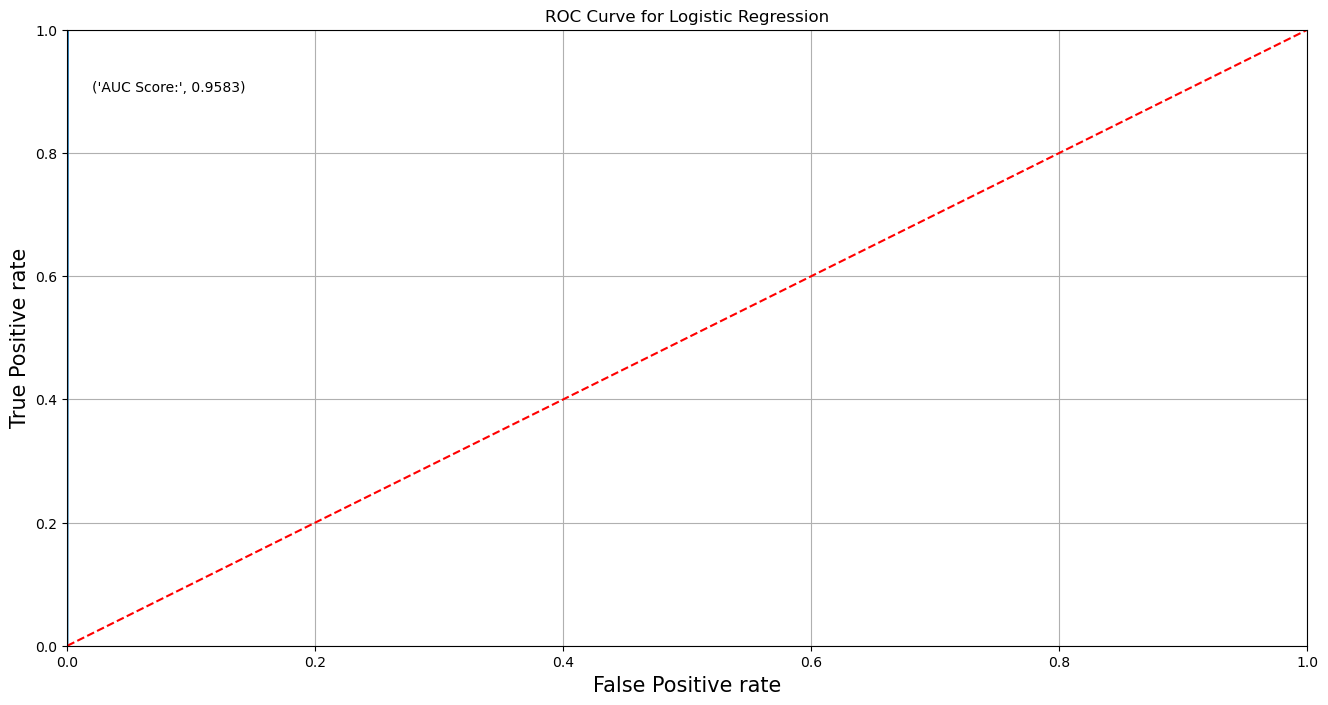

In [110]:
# findind roc curve for Random forest

from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], 'r--')

plt.title('ROC curve' , fontsize = 15)
plt.xlabel('False Positive rate', fontsize = 15)
plt.ylabel('True Positive rate', fontsize = 15)

plt.text(x= 0.02, y = 0.9, s = ('AUC Score:' , round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.title("ROC Curve for Logistic Regression")
plt.grid(True)

In [133]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Initialize score_card globally
score_card = pd.DataFrame(columns=['model_name', 'Accuracy Score', 'Precision Score', 'Recall Score',
                                   'AUC Score', 'f1-score'])

def update_score_card(y_test, y_pred, model_name):
    
    
    global score_card
    
    
    
    # Calculate scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Create new DataFrame to append
    new_row = pd.DataFrame([{'model_name': model_name,
                             'Accuracy Score': accuracy,
                             'Precision Score': precision,
                             'Recall Score': recall,
                             'AUC Score': auc,
                             'f1-score': f1}])
    
    # Concatenate new_row with score_card
    score_card = pd.concat([score_card, new_row], ignore_index=True)

# Example usage:
# Assuming y_test and y_pred are defined elsewhere
# update_score_card(y_test, y_pred, 'Model1')


In [135]:
update_score_card(y_test,y_pred, 'Logistic Regression')
update_score_card(y_test,y_pred_dt, 'Decision Tree')
update_score_card(y_test,y_pred_rf, 'Random Forest')
update_score_card(y_test,y_pred_xgb, 'XGBoost Classifier')

In [136]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1-score
0,Logistic Regression,0.958303,0.978181,0.937664,0.958339,0.957494
1,Decision Tree,0.997954,0.997068,0.998853,0.997953,0.997959
2,Random Forest,0.999783,0.999626,0.999941,0.999783,0.999784
3,XGBoost Classifier,0.999818,0.999637,1.000000,0.999818,0.999819
4,Logistic Regression,0.958303,0.978181,0.937664,0.958339,0.957494
5,Decision Tree,0.997954,0.997068,0.998853,0.997953,0.997959
6,Random Forest,0.999783,0.999626,0.999941,0.999783,0.999784
7,XGBoost Classifier,0.999818,0.999637,1.000000,0.999818,0.999819


Tuning the Model using GridSearchCV on XGBModel

In [148]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [138]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [140]:
param_grid = {
    'n_estimators': [50, 100, 500],
    'criterion' : ['Auto', 'sqrt', 'log2'],
    
    'max_features': ['gini', 'antropy']
}

In [142]:
gridsearch = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'criterion': ['Auto', 'sqrt', 'log2'],
                         'max_features': ['gini', 'antropy'],
                         'n_estimators': [50, 100, 500]})

In [143]:
print("Best Parameters :", gridsearch.best_params_)
print("Best Accuracy :", gridsearch.best_score_)

Best Parameters : {'criterion': 'Auto', 'max_features': 'gini', 'n_estimators': 500}
Best Accuracy : 0.9998316755872192


In [144]:
best_model = gridsearch.best_estimator_
y_pred_best = best_model.predict(X_test)

In [146]:
from sklearn.metrics import classification_report

In [147]:
print("classification_report")
print(classification_report(y_test, y_pred_best))

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Now Tuning the Model using RandomSearch on Logistic Regression

In [150]:
param_distributions = {
    'C' : [0.001, 0.1, 1, 10, 100],
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter' : [100, 200, 300],
    'class_weight' : [None, 'balanced']
}

In [154]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2,random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga',
                                                   'newton-cg', 'lbfgs']},
                   random_state=42, scoring='roc_auc', verbose=2)

In [155]:
best_model_lr = random_search.best_estimator_
y_pred_lr = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_lr)


In [161]:
print(f'Best ROC AUC Score: {roc_auc:.4f}')
print(f'Best Parameters: {random_search.best_params_}')

Best ROC AUC Score: 1.0000
Best Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'class_weight': 'balanced', 'C': 10}


In [163]:
y_pred_lr = best_model_lr.predict(X_test)
print('Classification Report')
print(classification_report(y_test, y_pred_lr))


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85149
           1       0.98      0.94      0.96     85440

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



In [164]:
import joblib

In [171]:
joblib.dump(model, "CreditCardFraudDetection Model.pkl")

['CreditCardFraudDetection Model.pkl']

In [173]:
model1 = joblib.load("CreditCardFraudDetection Model.pkl")

In [178]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [185]:
pred1 = model1.predict([[1.166616382,0.502120088,-0.067300314,2.261569239,0.428804195,0.089473517,0.24114658,0.138081705,-0.989162395,0.922174967,0.744785789,-0.53137725,-2.10534645,1.126870105,0.003075323,0.424424506,-0.454475292,-0.098870627,-0.816597307,-0.307168509,0.018701872,-0.061972267,-0.103854922,-0.370415177,0.603200339,0.108555873,-0.040520706,-0.011417815,0]])

In [186]:
if pred1 ==0:
    print("Legit Transaction")
else:
    print("fraud transaction")

Legit Transaction


In [191]:
pred3 = model1.predict([[-2.303349568,1.75924746,-0.359744743,2.330243051,-0.821628328,-0.075787571,0.562319782,-0.399146578,	-0.238253368,-1.525411627,2.032912158,-6.560124295,0.022937323,-1.470101536,-0.698826069,-2.282193829,-4.781830856,-2.615664945,-1.334441067,-0.430021867,-0.294166318,-0.932391057,	0.172726296,-0.087329538,-0.156114265,-0.542627889,0.039565989,-0.153028797,1]])

In [193]:
if pred3 ==0:
    print("Legit Transaction")
else:
    print("fraud transaction")

fraud transaction
